In [84]:
acc_results = {}
loss_results = {}
# List files in data:
from os import listdir
for folder in listdir("data"):
    acc_results[folder] = [0]*2400
    loss_results[folder] = [0]*2400
    if "True" in folder:
        for filename in listdir("data/"+folder):
            if filename != 'ps.out':
                with open("data/"+folder+"/"+filename, "r") as f:
                    for line in f.readlines():
                        if line.startswith("INFO:tensorflow:Step:"):
                            parts = line.split(" ")
                            step = int(parts[1][:-1])
                            if step > 5000:
                                break
                            accuracy = float(parts[3][:-1])
                            loss = float(parts[5])
                            acc_results[folder][step] += accuracy
                            loss_results[folder][step] += loss
        acc_results[folder] = [x/4.0 for x in acc_results[folder]]
        loss_results[folder] = [x/4.0 for x in loss_results[folder]]
    if "False" in folder:
        for filename in listdir("data/"+folder):
            if filename != 'ps.out':
                with open("data/"+folder+"/"+filename, "r") as f:
                    for line in f.readlines():
                        if line.startswith("INFO:tensorflow:Step:"):
                            parts = line.split(" ")
                            step = int(parts[1][:-1])
                            if step > 5000:
                                break
                            accuracy = float(parts[3][:-1])
                            loss = float(parts[5])
                            acc_results[folder][step] = accuracy
                            loss_results[folder][step] = loss


In [85]:
import numpy as np
#clean up
keys = []
for folder, acc in acc_results.items():
    if np.average(acc) == 0:
        keys.append(folder)
for k in keys:
    del acc_results[k]

keys = []
for folder, loss in loss_results.items():
    if np.average(loss) == 0:
        keys.append(folder)
for k in keys:
    del loss_results[k]

In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

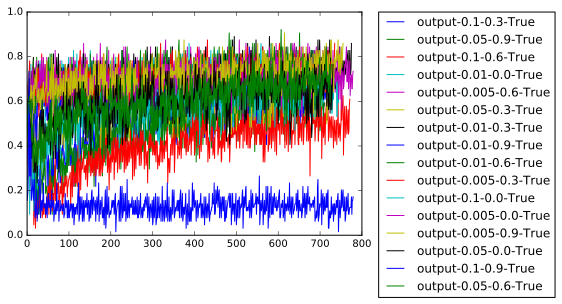

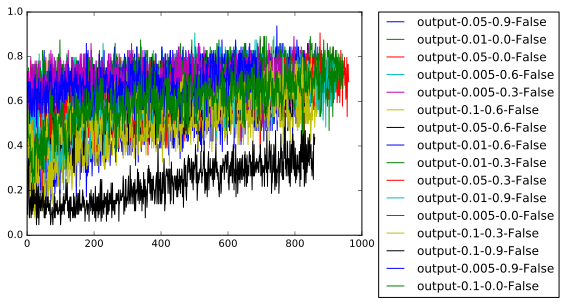

In [106]:
plt.figure()
plt.axis([0, 800, 0, 1])
for folder, acc in acc_results.items():
    if "True" in folder:
        plt.plot(acc, label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    
plt.figure()
plt.axis([0, 1000, 0, 1])
for folder, acc in acc_results.items():
    if "False" in folder:
        plt.plot(acc, label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


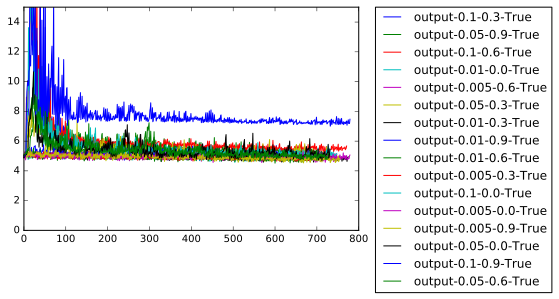

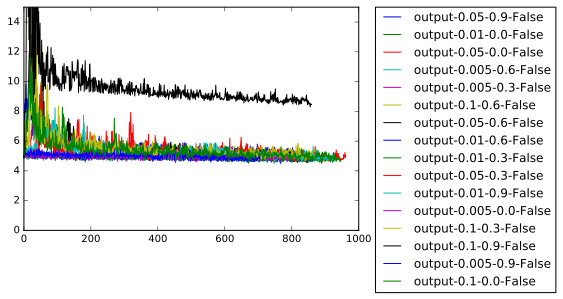

In [107]:
plt.figure()
plt.axis([0, 800, 0, 15])
for folder, loss in loss_results.items():
    if "True" in folder:
        plt.plot(loss, label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    
plt.figure()
plt.axis([0, 1000, 0, 15])
for folder, loss in loss_results.items():
    if "False" in folder:
        plt.plot(loss, label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [4]:
def moving_average(a, n=25) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

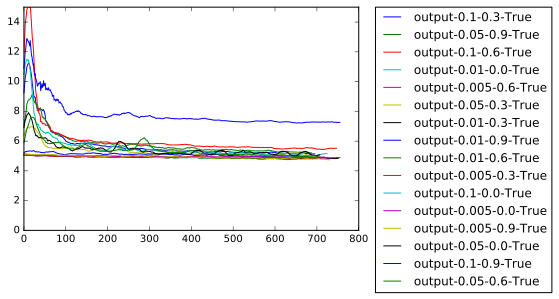

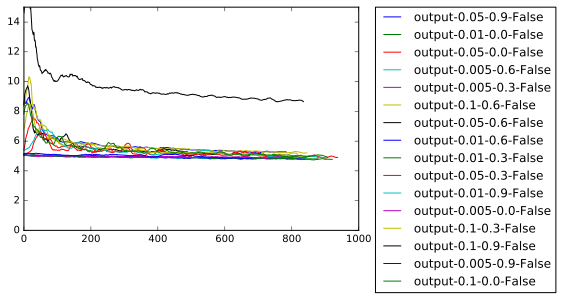

In [109]:
plt.figure()
plt.axis([0, 800, 0, 15])
for folder, loss in loss_results.items():
    if "True" in folder:
        plt.plot(moving_average(loss), label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    
plt.figure()
plt.axis([0, 1000, 0, 15])
for folder, loss in loss_results.items():
    if "False" in folder:
        plt.plot(moving_average(loss), label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


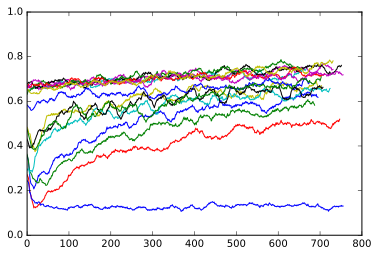

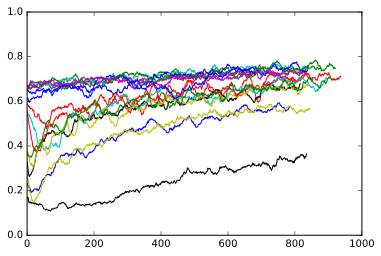

In [111]:
plt.figure()
plt.axis([0, 800, 0, 1])
for folder, acc in acc_results.items():
    if "True" in folder:
        plt.plot(moving_average(acc))
    
plt.figure()
plt.axis([0, 1000, 0, 1])
for folder, acc in acc_results.items():
    if "False" in folder:
        plt.plot(moving_average(acc))

In [86]:
# there are zeros in the async iterations, lets average them in.
comp_acc_results = {}
for key, val in acc_results.items():
    comp_acc_results[key] = []
    for x in val:
        if  x != 0:
            comp_acc_results[key].append(x)

comp_loss_results = {}
for key, val in loss_results.items():
    comp_loss_results[key] = []
    for x in val:
        if  x != 0:
            comp_loss_results[key].append(x)
        
    

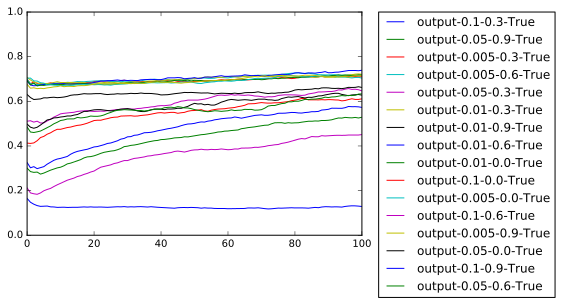

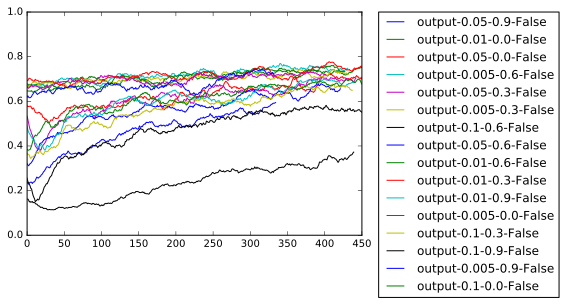

In [87]:
plt.figure()
plt.axis([0, 100, 0, 1])
for folder, acc in comp_acc_results.items():
    if "True" in folder:
        plt.plot(moving_average(acc), label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure()
plt.axis([0, 450, 0, 1])
for folder, acc in comp_acc_results.items():
    if "False" in folder:
        plt.plot(moving_average(acc), label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


/Users/daniter/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


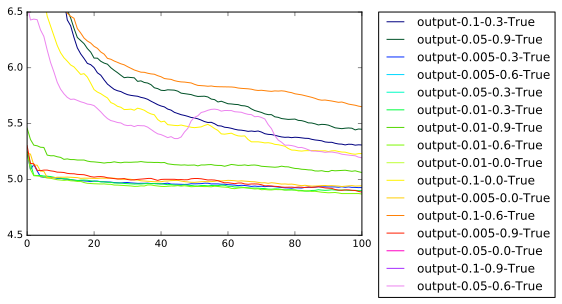

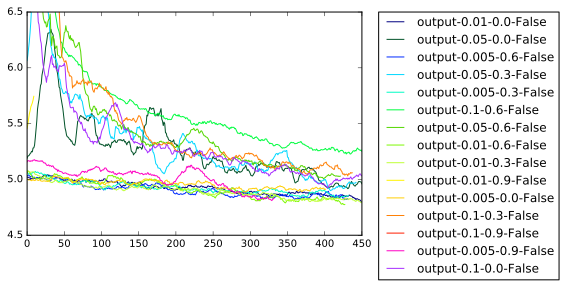

In [81]:

plt.figure()
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, 16)])
plt.axis([0, 100, 4.5, 6.5])
for folder, loss in comp_loss_results.items():
    if "True" in folder:
        plt.plot(moving_average(loss), label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.figure()
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, 16)])
plt.axis([0, 450, 4.5, 6.5])
for folder, loss in comp_loss_results.items():
    if "False" in folder:
        plt.plot(moving_average(loss), label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
for key, val in comp_loss_results.items():
    if len(val) < 25:
        print key
    else:
        print(key+ ": " + str(moving_average(val)[-1]) + " / " +str(len(moving_average(val))))
   
print("~~~~")

for key, val in comp_acc_results.items():
    if len(val) < 25:
        print key
    else:
        print(key+ ": " + str(moving_average(val)[-1]) + " / " +str(len(moving_average(val))))

output-0.1-0.3-True: 5.16313234 / 155
output-0.01-0.0-False: 4.8034558 / 459
output-0.05-0.0-False: 4.8892884 / 499
output-0.005-0.6-False: 4.82885528 / 432
output-0.05-0.9-True: 5.25276648 / 153
output-0.05-0.3-False: 4.97404316 / 443
output-0.005-0.3-True: 4.881958 / 159
output-0.005-0.3-False: 4.85691056 / 433
output-0.1-0.6-False: 5.25491856 / 465
output-0.005-0.6-True
output-0.05-0.3-True
output-0.01-0.3-True: 4.84791863 / 169
output-0.01-0.9-True: 4.99510804 / 150
output-0.01-0.6-True: 4.8010022 / 145
output-0.01-0.0-True
output-0.05-0.6-False: 5.02939996 / 422
output-0.01-0.6-False: 4.7757942 / 428
output-0.1-0.0-True: 4.93128397 / 163
output-0.005-0.0-True: 4.9027859 / 170
output-0.01-0.3-False: 4.80084528 / 501
output-0.1-0.6-True: 5.50188067 / 168
output-0.01-0.9-False: 5.74491428 / 10
output-0.005-0.9-True: 4.78580508 / 164
output-0.005-0.0-False: 4.9122722 / 402
output-0.1-0.3-False: 5.05963568 / 438
output-0.1-0.9-False: 8.70334596 / 440
output-0.05-0.0-True
output-0.005-0

In [1]:

lrs = [0.005, 0.01, 0.05, 0.1]
#lrs = [0.005, 0.01, 0.05]
momentums = [0.0, 0.3, 0.6, 0.9]

f, axes = plt.subplots(1, len(lrs), sharey=True, figsize=(12,3))

for ind in range(len(lrs)):
    lr=lrs[ind]
    x_sync = []
    y_sync = []
    x_async = []
    y_async = []
    for m in momentums:
        sync_key = "output-%s-%s-%s" % (str(lr), str(m), "True")
        async_key = "output-%s-%s-%s" % (str(lr), str(m), "False")
        x_sync.append(m)
        x_async.append(m)
        if sync_key in comp_acc_results:
            y_sync.append(moving_average(acc_results[sync_key])[-1])
        else:
            y_sync.append(np.nan)
        if async_key in comp_acc_results:
            y_async.append(moving_average(acc_results[async_key])[-1])
        else:
            y_async.append(np.nan)


    ax = axes[ind]
    ax.plot(x_sync, y_sync, '-*', markersize=12)
    ax.plot(x_async, y_async, '-v', markersize=12)
    ax.set_xlabel('Explicit momentum')
    ax.set_ylabel('Training Accuracy')
    ax.set_title('LR = ' + str(lr))
    ax.grid()
    ax.axis([0,1.0, 0.56, 0.8])
    plt.legend(['Synchronous', 'Asynchronous'], loc='best')

    
f.savefig('exp1-accuracy-4graphs-full.png', bbox_inches='tight', pad_inches=0.1)



NameError: name 'plt' is not defined

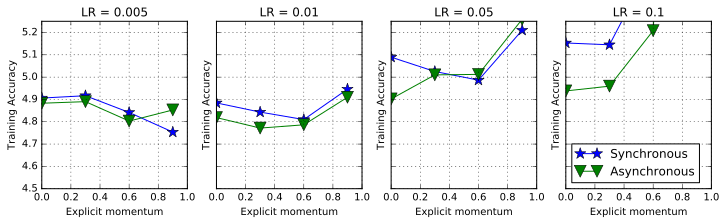

In [115]:

lrs = [0.005, 0.01, 0.05, 0.1]
#lrs = [0.005, 0.01, 0.05]
momentums = [0.0, 0.3, 0.6, 0.9]

f, axes = plt.subplots(1, len(lrs), sharey=True, figsize=(12,3))

for ind in range(len(lrs)):
    lr=lrs[ind]
    x_sync = []
    y_sync = []
    x_async = []
    y_async = []
    for m in momentums:
        sync_key = "output-%s-%s-%s" % (str(lr), str(m), "True")
        async_key = "output-%s-%s-%s" % (str(lr), str(m), "False")
        x_sync.append(m)
        x_async.append(m)
        if sync_key in comp_loss_results:
            if len(comp_acc_results[sync_key]) < 100:
                y_sync.append(np.nan)
            else:
                y_sync.append(moving_average(loss_results[sync_key])[-1])
        else:
            y_sync.append(np.nan)
        if async_key in comp_loss_results:
            if len(comp_acc_results[async_key]) < 100:
                y_async.append(np.nan)
            else:
                y_async.append(moving_average(loss_results[async_key])[-1])
        else:
            y_async.append(np.nan)

#     #plt.figure()
#     plt.plot(x_sync, y_sync, '-*', markersize=12)
#     plt.plot(x_async, y_async, '-v', markersize=12)
#     plt.xlabel('Explicit momentum')
#     plt.ylabel('Training Accuracy')
#     plt.title('Learning rate = ' + str(lr))
#     plt.grid()
#     plt.axis([0,1.0, 0.5, 0.8])
#     plt.legend(['Synchronous', 'Asynchronous'], loc='best')
    ax = axes[ind]
    ax.plot(x_sync, y_sync, '-*', markersize=12)
    ax.plot(x_async, y_async, '-v', markersize=12)
    ax.set_xlabel('Explicit momentum')
    ax.set_ylabel('Training Accuracy')
    ax.set_title('LR = ' + str(lr))
    ax.grid()
    ax.axis([0,1.0, 4.5, 5.25])
    plt.legend(['Synchronous', 'Asynchronous'], loc='best')
    
f.savefig('exp1-loss-4graphs-full.png', bbox_inches='tight', pad_inches=0.1)

In [105]:
acc_results = {}
loss_results = {}
# List files in data:
from os import listdir
for folder in listdir("data"):
    acc_results[folder] = []
    loss_results[folder] = []
    for filename in listdir("data/"+folder):
        if filename != 'ps.out':
            with open("data/"+folder+"/"+filename, "r") as f:
                for line in f.readlines():
                    if line.startswith("INFO:tensorflow:Step:"):
                        parts = line.split(" ")
                        step = int(parts[1][:-1])
                        if step > 5000:
                            break
                        accuracy = float(parts[3][:-1])
                        loss = float(parts[5])
                        acc_results[folder].append((step, accuracy))
                        loss_results[folder].append((step, loss))

for key, val in acc_results.items():
    val.sort()
    acc_results[key] = [y for x,y in val]
for key, val in loss_results.items():
    val.sort()
    loss_results[key] = [y for x,y in val]
